In [1]:
import pandas as pd                  # Pandas
import numpy as np                   # Numpy
from matplotlib import pyplot as plt # Matplotlib

# Package to implement ML Algorithms
import sklearn
from sklearn.tree import DecisionTreeClassifier     # Decision Tree
from sklearn.ensemble import RandomForestClassifier # Random Forest

# Package for data partitioning
from sklearn.model_selection import train_test_split

# Package for generating confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Package for generating classification report
from sklearn.metrics import classification_report

# Import packages to implement Stratified K-fold CV
from sklearn.model_selection import StratifiedKFold # For creating folds

# Import Package to implement GridSearch CV
from sklearn.model_selection import GridSearchCV

# Importing package for Randomized Search CV
from sklearn.model_selection import RandomizedSearchCV

# Package to record time
import time

# Package for Data pretty printer
from pprint import pprint

# Module to save and load Python objects to and from files
import pickle 

# Ignore Deprecation Warnings
import warnings
warnings.filterwarnings('ignore')

# Display inline plots as vector-based (svg)
%config InlineBackend.figure_formats = ['svg']

%matplotlib inline

In [2]:

df_fetal_health = pd.read_csv('fetal_health.csv')
df_fetal_health.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [3]:
#check missing values
df_fetal_health.isna().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [4]:
#check variable type
df_fetal_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [5]:
# Mapping for conversion
mapping = {1: 'Normal', 2: 'Suspect', 3: 'Pathological'}

# Convert the encoded variable
df_fetal_health['fetal_health'] = df_fetal_health['fetal_health'].replace(mapping)
df_fetal_health['fetal_health']



0       Suspect
1        Normal
2        Normal
3        Normal
4        Normal
         ...   
2121    Suspect
2122    Suspect
2123    Suspect
2124    Suspect
2125     Normal
Name: fetal_health, Length: 2126, dtype: object

In [6]:
#Check distribution of the fetal_health class
df_fetal_health['fetal_health'].value_counts(normalize=True)
#classes are imbalance

fetal_health
Normal          0.778457
Suspect         0.138758
Pathological    0.082785
Name: proportion, dtype: float64

In [7]:
#data sample
sample_data = df_fetal_health.head()
sample_data
sample_data.to_csv('midterm_app1_sample_data.csv') 

In [8]:
#partition data into predictors and response
X_variables = df_fetal_health.drop(columns = ['fetal_health'])
y_variable = df_fetal_health['fetal_health']

In [9]:
#partition data into test/train dataset
app1_train_X, app1_test_X, app1_train_y, app1_test_y = train_test_split(X_variables, y_variable, test_size = 0.2, random_state = 42)

In [10]:
#initialize model type
rf_mod_classifier = RandomForestClassifier(random_state = 42)

In [11]:
# Start with an initial guess for parameters
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 500, num = 10)]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 20, num = 10)]

# Minimum number of samples required to split a node
min_samples_split = [int(x) for x in np.linspace(5, 30, num = 6)]

# Minimum number of samples required at each leaf node
min_samples_leaf = [int(x) for x in np.linspace(5, 30, num = 6)]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

pprint(random_grid)

{'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
 'min_samples_leaf': [5, 10, 15, 20, 25, 30],
 'min_samples_split': [5, 10, 15, 20, 25, 30],
 'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]}


In [12]:
# Creating folds
folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 100)

# Call RandomizedSearchCV()
rf_class_mod_rand = RandomizedSearchCV(estimator = rf_mod_classifier, 
                              param_distributions = random_grid,
                              n_iter = 100,
                              scoring = 'f1_macro', 
                              cv = folds, 
                              verbose = 1,
                              random_state = 42,
                              n_jobs = -1) # Will utilize all available CPUs 

In [13]:
#tune with RandomCV
rf_class_mod_rand.fit(app1_train_X, app1_train_y)  

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=100, shuffle=True),
                   estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [2, 4, 6, 8, 10, 12, 14,
                                                      16, 18, 20],
                                        'min_samples_leaf': [5, 10, 15, 20, 25,
                                                             30],
                                        'min_samples_split': [5, 10, 15, 20, 25,
                                                              30],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300, 350, 400, 450,
                                                         500]},
                   random_state=42, scoring='f1_macro', verbose=1)

In [14]:
print('Initial score: ', rf_class_mod_rand.best_score_)
print('Initial parameters: ', rf_class_mod_rand.best_params_)

Initial score:  0.8485299173914308
Initial parameters:  {'n_estimators': 300, 'min_samples_split': 15, 'min_samples_leaf': 5, 'max_depth': 10}


In [15]:
#check which range of hyperparameters to tune
df_hyper_rand_results = pd.DataFrame(rf_class_mod_rand.cv_results_)
df_hyper_rand_results[['param_n_estimators', 'param_min_samples_split', 'param_min_samples_leaf','param_max_depth','mean_test_score']].sort_values(by='mean_test_score',ascending=False)

,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_depth,mean_test_score
6,300,15,5,10,0.848530
16,400,5,5,18,0.844908
71,250,20,5,10,0.836809
95,350,15,5,8,0.836334
93,400,25,5,16,0.835052
...,...,...,...,...,...
14,300,10,30,2,0.637899
43,50,5,15,2,0.636329
80,50,10,10,2,0.632788
91,100,30,25,2,0.618930


In [16]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 9)]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(8, 18, num = 10)]

# Minimum number of samples required to split a node
min_samples_split = [int(x) for x in np.linspace(5, 30, num = 6)]

# Minimum number of samples required at each leaf node
min_samples_leaf = [int(x) for x in np.linspace(2, 7, num = 6)]

hyper_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
               }

pprint(hyper_grid)

{'max_depth': [8, 9, 10, 11, 12, 13, 14, 15, 16, 18],
 'min_samples_leaf': [2, 3, 4, 5, 6, 7],
 'min_samples_split': [5, 10, 15, 20, 25, 30],
 'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500]}


In [17]:
# Call GridSearchCV()
rf_class_mod_grid_cv = GridSearchCV(estimator = rf_mod_classifier, 
                        param_grid = hyper_grid, 
                        scoring= 'f1_macro', 
                        cv = folds, 
                        verbose = 1,
                        n_jobs = -1) 

In [18]:
rf_class_mod_grid_cv.fit(app1_train_X, app1_train_y) 

Fitting 3 folds for each of 3240 candidates, totalling 9720 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=100, shuffle=True),
             estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [8, 9, 10, 11, 12, 13, 14, 15, 16, 18],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7],
                         'min_samples_split': [5, 10, 15, 20, 25, 30],
                         'n_estimators': [100, 150, 200, 250, 300, 350, 400,
                                          450, 500]},
             scoring='f1_macro', verbose=1)

In [19]:
print('Improved score: ', rf_class_mod_grid_cv.best_score_)
print('Improved parameters: ', rf_class_mod_grid_cv.best_params_)

Improved score:  0.8758205618636684
Improved parameters:  {'max_depth': 11, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 250}


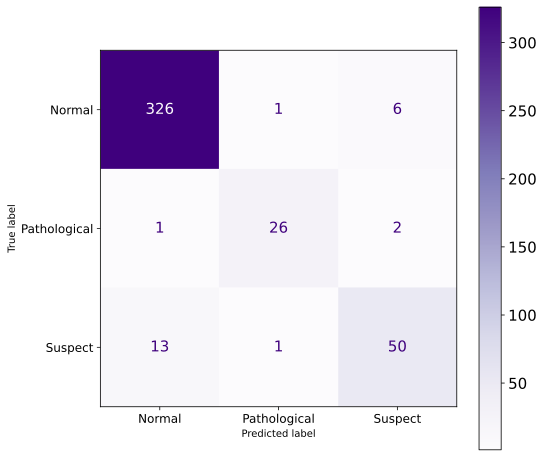

In [20]:
# Predictions on test set
y_pred = rf_class_mod_grid_cv.predict(app1_test_X)

# Generate confusion matrix
cm = confusion_matrix(app1_test_y, y_pred, labels = rf_class_mod_grid_cv.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = rf_class_mod_grid_cv.classes_)

# Specify figure size and font size
fig, ax = plt.subplots(figsize = (8, 8))
plt.rcParams.update({'font.size': 15})
plt.yticks(fontsize = 12) # fontsize of yticks
plt.xticks(fontsize = 12) # fontsize of xticks

# Display Confusion Matrix
disp.plot(cmap = 'Purples', ax = ax);

In [21]:
# Generating Classification Report
report = classification_report(app1_test_y, y_pred, output_dict = True)
report_df = pd.DataFrame(report)
report_df
report_df.to_csv('midterm_app1_rf_class_report_fixed_strata.csv') 

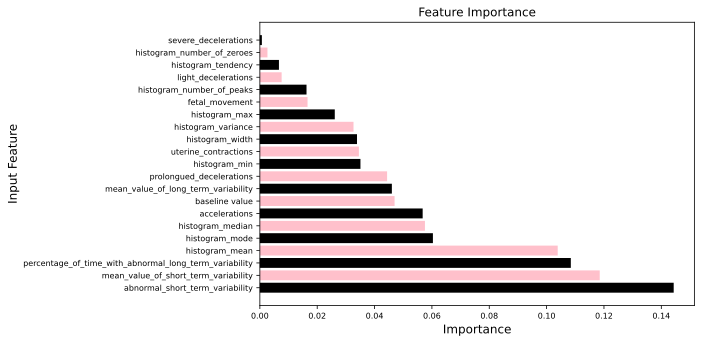

In [22]:
# Storing importance values from the trained model
importance = rf_class_mod_grid_cv.best_estimator_.feature_importances_

# Storing feature importance as a dataframe
feature_imp = pd.DataFrame(list(zip(app1_train_X.columns, importance)),
               columns = ['Feature', 'Importance'])

feature_imp = feature_imp.sort_values('Importance', ascending = False).reset_index(drop = True)

# Bar plot
plt.figure(figsize=(10, 5))
plt.barh(feature_imp['Feature'], feature_imp['Importance'], color = ['black', 'pink'])

plt.xlabel("Importance", fontsize = 12)
plt.ylabel("Input Feature", fontsize = 12)
plt.title('Feature Importance', fontsize = 12) 
plt.yticks(fontsize = 8) # fontsize of yticks
plt.xticks(fontsize = 8) # fontsize of xticks

plt.tight_layout();

In [23]:
app1_best_class_rf = rf_class_mod_grid_cv.best_estimator_

In [24]:

# Creating the file where we want to write the model
rf_pickle = open('rf_mobile_fixed_strata.pickle', 'wb') 

# Write RF model to the file
pickle.dump(app1_best_class_rf, rf_pickle) 

# Close the file
rf_pickle.close()

In [25]:
df_fetal_health_user = pd.read_csv('fetal_health_user.csv')
df_fetal_health_user.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,123,0.004,0.0,0.005,0.005,0,0.0,24,1.3,0,...,56,92,148,3,0,121,123,125,7,0
1,123,0.000,0.0,0.005,0.004,0,0.0,47,1.1,31,...,130,59,189,14,2,129,122,127,15,0
2,123,0.000,0.0,0.005,0.005,0,0.0,50,0.8,32,...,94,75,169,7,0,125,122,126,8,0
3,123,0.000,0.0,0.005,0.006,0,0.0,45,1.0,19,...,85,59,144,8,1,124,119,125,14,1
4,123,0.006,0.0,0.006,0.004,0,0.0,33,1.3,0,...,138,61,199,9,1,135,122,127,39,0


In [26]:
predicted_classes = app1_best_class_rf.predict(df_fetal_health_user)
predicted_probabilities = app1_best_class_rf.predict_proba(df_fetal_health_user)

In [27]:
predicted_classes

array(['Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Suspect',
       'Suspect', 'Suspect', 'Suspect', 'Pathological', 'Pathological',
       'Pathological', 'Pathological', 'Pathological', 'Pathological',
       'Pathological'], dtype=object)

In [28]:
predicted_probabilities

array([[9.99158898e-01, 1.05701374e-04, 7.35401095e-04],
       [8.05580454e-01, 1.12117244e-02, 1.83207821e-01],
       [9.16559051e-01, 1.59211872e-03, 8.18488304e-02],
       [9.63861454e-01, 6.10087180e-04, 3.55284589e-02],
       [9.98140287e-01, 7.35464048e-05, 1.78616688e-03],
       [1.98125418e-01, 1.00751280e-02, 7.91799454e-01],
       [5.04365600e-02, 9.54858184e-03, 9.40014858e-01],
       [4.63649418e-01, 3.01830656e-03, 5.33332275e-01],
       [1.75825298e-01, 8.56509560e-03, 8.15609606e-01],
       [2.25776897e-02, 9.77343943e-01, 7.83668536e-05],
       [1.15363395e-02, 9.86810610e-01, 1.65305040e-03],
       [1.02666667e-02, 9.88133333e-01, 1.60000000e-03],
       [1.27271429e-01, 8.52585714e-01, 2.01428571e-02],
       [4.66666667e-03, 9.91666667e-01, 3.66666667e-03],
       [6.00000000e-03, 9.93000000e-01, 1.00000000e-03],
       [4.66666667e-03, 9.95333333e-01, 0.00000000e+00]])

In [29]:
highest_proba = np.max(predicted_probabilities,axis=1)
highest_proba

array([0.9991589 , 0.80558045, 0.91655905, 0.96386145, 0.99814029,
       0.79179945, 0.94001486, 0.53333228, 0.81560961, 0.97734394,
       0.98681061, 0.98813333, 0.85258571, 0.99166667, 0.993     ,
       0.99533333])

In [30]:
np.argmax(predicted_probabilities, axis=1)


array([0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1])

In [31]:
df_fetal_health_user['Predicted Fetal Health'] = predicted_classes
df_fetal_health_user['Prediction Probability (%)'] = highest_proba

In [32]:
df_fetal_health_user

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,Predicted Fetal Health,Prediction Probability (%)
0,123,0.004,0.000,0.005,0.005,0,0.000,24,1.3,0,...,148,3,0,121,123,125,7,0,Normal,0.999159
1,123,0.000,0.000,0.005,0.004,0,0.000,47,1.1,31,...,189,14,2,129,122,127,15,0,Normal,0.805580
2,123,0.000,0.000,0.005,0.005,0,0.000,50,0.8,32,...,169,7,0,125,122,126,8,0,Normal,0.916559
3,123,0.000,0.000,0.005,0.006,0,0.000,45,1.0,19,...,144,8,1,124,119,125,14,1,Normal,0.963861
4,123,0.006,0.000,0.006,0.004,0,0.000,33,1.3,0,...,199,9,1,135,122,127,39,0,Normal,0.998140
5,138,0.000,0.009,0.002,0.002,0,0.000,60,0.5,9,...,150,3,0,144,140,144,4,1,Suspect,0.791799
6,141,0.000,0.017,0.002,0.002,0,0.000,60,0.4,41,...,159,3,0,154,149,154,8,1,Suspect,0.940015
7,141,0.005,0.023,0.002,0.001,0,0.000,53,1.0,28,...,180,13,0,154,149,154,10,1,Suspect,0.533332
8,141,0.001,0.020,0.001,0.001,0,0.000,59,0.5,38,...,159,3,0,154,149,154,8,1,Suspect,0.815610
9,129,0.000,0.001,0.006,0.009,0,0.001,65,2.8,0,...,151,7,2,105,88,112,13,0,Pathological,0.977344
